In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
ipl=pd.read_csv("matches[1].csv")

In [265]:
ipl.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [266]:
ipl['super_over'] = ipl['super_over'].replace({'N': 0, 'Y': 1})

In [267]:
ipl.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,0,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,0,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,0,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,0,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,0,NaN,BF Bowden,K Hariharan


In [270]:
ipl.isna().any()

id                 False
season             False
city                True
date               False
match_type         False
player_of_match     True
venue              False
team1              False
team2              False
toss_winner        False
toss_decision      False
winner              True
result             False
result_margin       True
target_runs         True
target_overs        True
super_over         False
method              True
umpire1            False
umpire2            False
dtype: bool

In [271]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [272]:
ipl.describe()

,id,result_margin,target_runs,target_overs,super_over
count,1.095000e+03,1076.000000,1092.000000,1092.000000,1095.000000
mean,9.048283e+05,17.259294,165.684066,19.759341,0.012785
std,3.677402e+05,21.787444,33.427048,1.581108,0.112399
min,3.359820e+05,1.000000,43.000000,5.000000,0.000000
25%,5.483315e+05,6.000000,146.000000,20.000000,0.000000
50%,9.809610e+05,8.000000,166.000000,20.000000,0.000000
75%,1.254062e+06,20.000000,187.000000,20.000000,0.000000
max,1.426312e+06,146.000000,288.000000,20.000000,1.000000


### Frequency of most MOM awards

In [273]:
ipl['player_of_match'].value_counts()

player_of_match
AB de Villiers       25
CH Gayle             22
RG Sharma            19
DA Warner            18
V Kohli              18
                     ..
NV Ojha               1
KV Sharma             1
Washington Sundar     1
PD Collingwood        1
Shahbaz Ahmed         1
Name: count, Length: 291, dtype: int64

In [274]:
# Top 5 players of MOM Awards
ipl['player_of_match'].value_counts()[0:5]

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
Name: count, dtype: int64

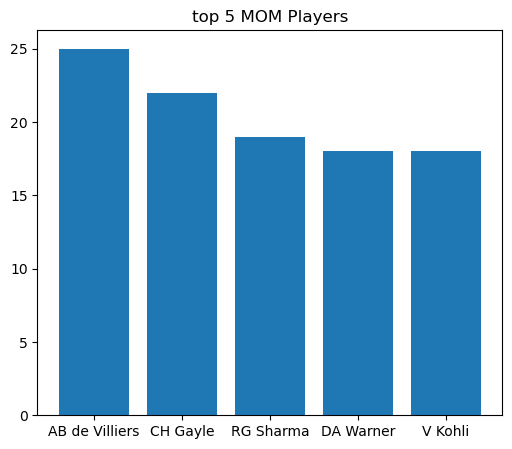

In [327]:
# bar graph for top 5 mom
plt.figure(figsize=(6,5))
plt.bar(ipl['player_of_match'].value_counts()[0:5].keys(),ipl['player_of_match'].value_counts()[0:5])
plt.title("top 5 MOM Players")
plt.show()

### Total matches played in entire ipl Season

In [328]:
ipl['id'].count()

1095

In [332]:
ipl['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

### frequency of results

In [277]:
ipl['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

### Finding no of toss wins w.r.t teams

In [278]:
ipl['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

# extracting details of team won by batting first

In [279]:
batting_first=ipl[ipl['result']=="runs"]

In [280]:
batting_first.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,0,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,0,NaN,MR Benson,SL Shastri
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,209.0,20.0,0,NaN,DJ Harper,GA Pratapkumar
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,183.0,20.0,0,NaN,Aleem Dar,AM Saheba
14,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,179.0,20.0,0,NaN,BR Doctrove,RB Tiffin


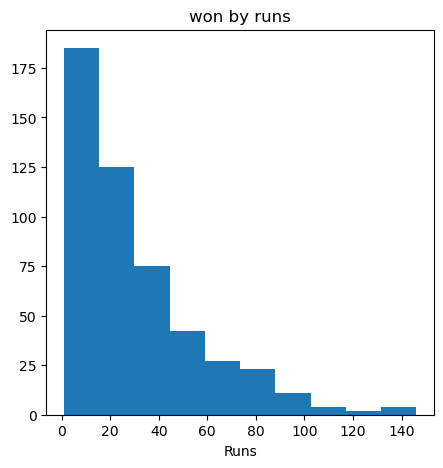

In [281]:
# histogram
plt.figure(figsize=(5,5))
plt.hist(batting_first['result_margin'])
plt.title("won by runs")
plt.xlabel("Runs")
plt.show()

In [282]:
# winner w.r.t batting first
batting_first['winner'].value_counts()

winner
Mumbai Indians                 71
Chennai Super Kings            71
Kolkata Knight Riders          54
Royal Challengers Bangalore    53
Sunrisers Hyderabad            44
Rajasthan Royals               43
Kings XI Punjab                40
Delhi Daredevils               25
Delhi Capitals                 21
Deccan Chargers                18
Lucknow Super Giants           16
Gujarat Titans                 11
Punjab Kings                   11
Pune Warriors                   6
Rising Pune Supergiant          5
Royal Challengers Bengaluru     4
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: count, dtype: int64

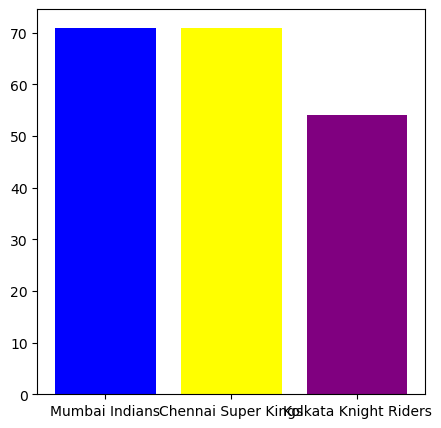

In [283]:
# bar graph of top 3 temas won by batting first
plt.figure(figsize=(5,5))
plt.bar(batting_first['winner'].value_counts()[0:3].keys(),batting_first['winner'].value_counts()[0:3],color=["blue","yellow","purple"])
plt.show()

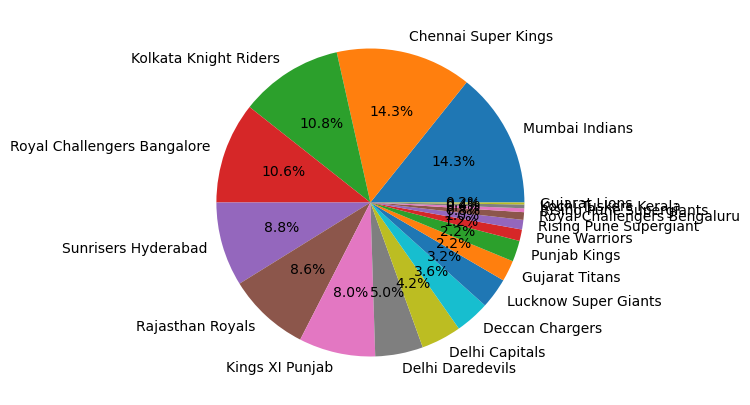

In [284]:
# pie chart
plt.figure(figsize=(5,5))
plt.pie(batting_first['winner'].value_counts(),labels=batting_first['winner'].value_counts().keys(),autopct="%0.1f%%")
plt.show()

# extracting deatils of team won by batting Second 

In [285]:
batting_second=ipl[ipl["result"]=="wickets"]

In [286]:
batting_second.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,0,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,0,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,0,NaN,BF Bowden,K Hariharan
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,0,NaN,Aleem Dar,RB Tiffin
6,335988,2007/08,Hyderabad,2008-04-22,League,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,143.0,20.0,0,NaN,IL Howell,AM Saheba


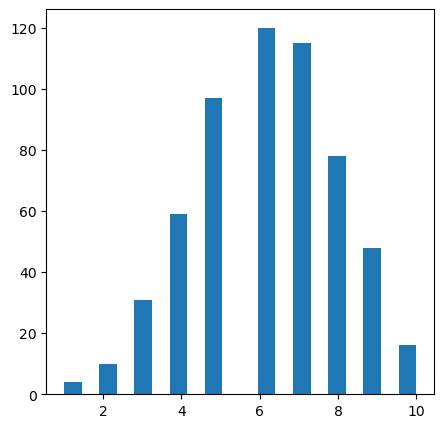

In [287]:
#histogram
plt.figure(figsize=(5,5))
plt.hist(batting_second['result_margin'],bins=20)
plt.show()

In [288]:
#total wins by teams in second batting
batting_second['winner'].value_counts()

winner
Kolkata Knight Riders          76
Mumbai Indians                 71
Rajasthan Royals               67
Chennai Super Kings            67
Royal Challengers Bangalore    61
Kings XI Punjab                45
Sunrisers Hyderabad            43
Delhi Daredevils               42
Delhi Capitals                 24
Gujarat Titans                 17
Punjab Kings                   13
Gujarat Lions                  12
Deccan Chargers                11
Lucknow Super Giants            8
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Royal Challengers Bengaluru     3
Name: count, dtype: int64

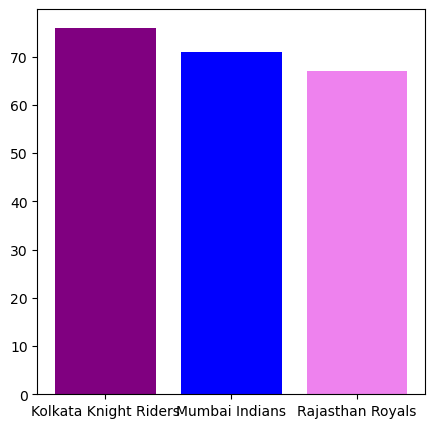

In [289]:
#bar plot for top 3 teams won by highest wickets
plt.figure(figsize=(5,5))
plt.bar(batting_second['winner'].value_counts()[0:3].keys(),batting_second['winner'].value_counts()[0:3],color=["purple","blue",'violet'])
plt.show()

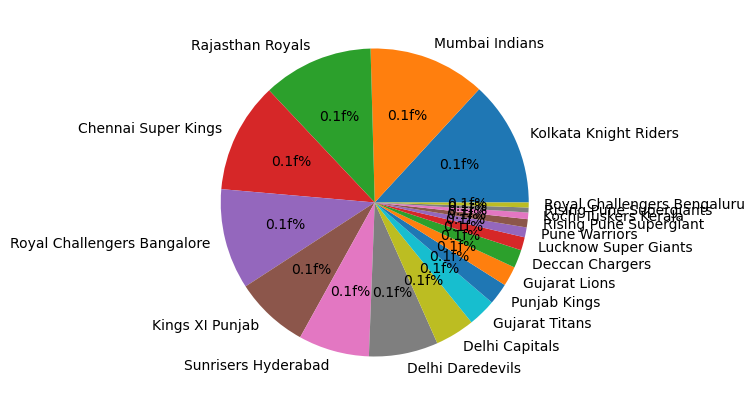

In [290]:
plt.figure(figsize=(5,5))
plt.pie(batting_second['winner'].value_counts(),labels=batting_second['winner'].value_counts().keys(),autopct="0.1f%%")
plt.show()

In [291]:
#looking at no of matches played at each season
ipl['season'].value_counts()

season
2013       76
2023       74
2012       74
2022       74
2011       73
2024       71
2018       60
2021       60
2020/21    60
2019       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64

### looking at no of matches played at each city

In [300]:
ipl['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

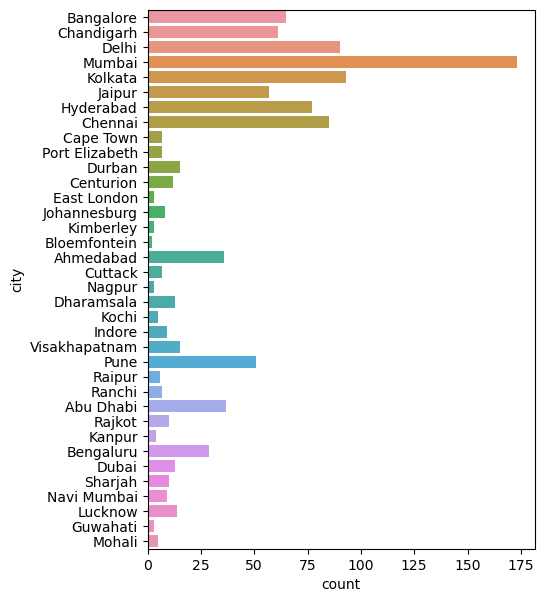

In [308]:
fig,ax=plt.subplots(figsize=(5,7))
sns.countplot(y='city',data=ipl)
plt.show()

### team won with max runs

In [189]:
ipl.iloc[batting_first['result_margin'].idxmax()]

id                          1082635
season                         2017
city                          Delhi
date                     2017-05-06
match_type                   League
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
team1              Delhi Daredevils
team2                Mumbai Indians
toss_winner        Delhi Daredevils
toss_decision                 field
winner               Mumbai Indians
result                         runs
result_margin                 146.0
target_runs                   213.0
target_overs                   20.0
super_over                        0
method                          NaN
umpire1                 Nitin Menon
umpire2                   CK Nandan
results                     wickets
Name: 620, dtype: object

### team won with max wickets

In [188]:
ipl.iloc[batting_second['result_margin'].idxmax()]

id                                     335994
season                                2007/08
city                                   Mumbai
date                               2008-04-27
match_type                             League
player_of_match                  AC Gilchrist
venue              Dr DY Patil Sports Academy
team1                          Mumbai Indians
team2                         Deccan Chargers
toss_winner                   Deccan Chargers
toss_decision                           field
winner                        Deccan Chargers
result                                wickets
result_margin                            10.0
target_runs                             155.0
target_overs                             20.0
super_over                                  0
method                                    NaN
umpire1                             Asad Rauf
umpire2                            SL Shastri
results                               wickets
Name: 12, dtype: object

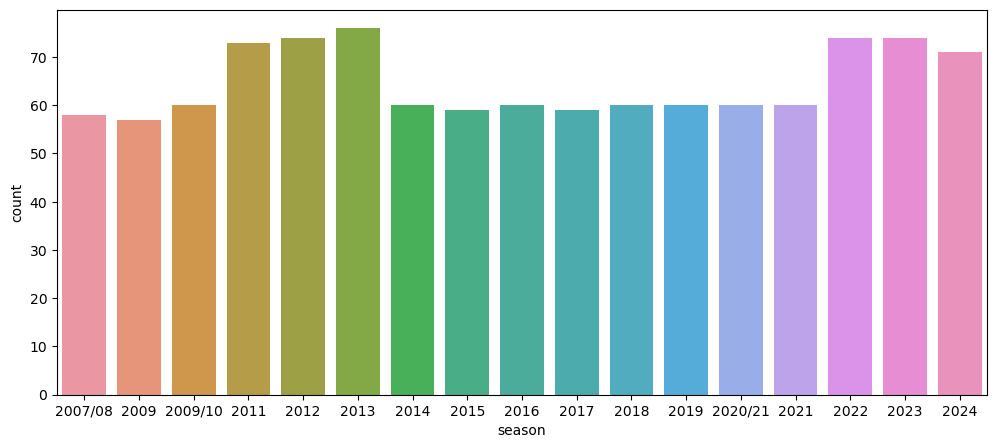

In [312]:
### how many matches played per season
fig,ax=plt.subplots(figsize=(12,5))
sns.countplot(x='season',data=ipl)
plt.show()

### which is the most succesful IPL team

In [216]:
ipl['winner'].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

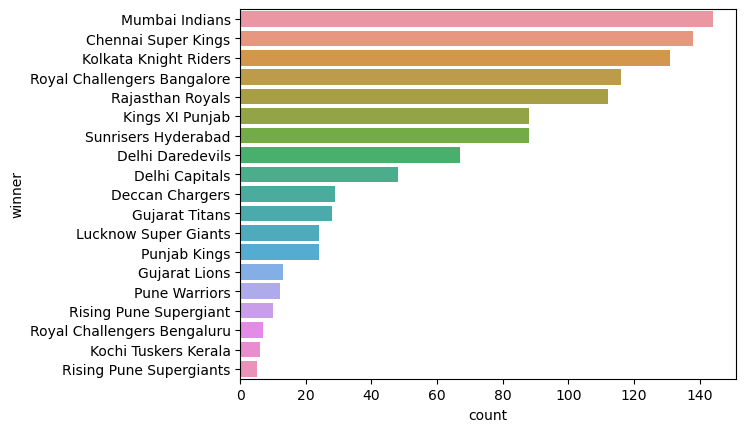

In [217]:
data=ipl['winner'].value_counts()
sns.barplot(y=data.index,x=data)
plt.show()

In [231]:
win_propability=ipl['toss_winner']==ipl['winner']
result=win_propability.groupby(win_propability).size()
result

False    541
True     554
dtype: int64

### highest wins by team in a particular season

In [320]:
ipl.groupby('season')['winner'].value_counts()

season   winner                     
2007/08  Rajasthan Royals               13
         Kings XI Punjab                10
         Chennai Super Kings             9
         Mumbai Indians                  7
         Delhi Daredevils                7
                                        ..
2024     Royal Challengers Bengaluru     7
         Chennai Super Kings             7
         Punjab Kings                    5
         Gujarat Titans                  5
         Mumbai Indians                  4
Name: count, Length: 146, dtype: int64

In [321]:
# Decision after winning toss
ipl['toss_decision'].value_counts()

toss_decision
field    704
bat      391
Name: count, dtype: int64

In [323]:
# how many super overs[1] and non supr over[0] matches in entire season 
ipl['super_over'].value_counts()

super_over
0    1081
1      14
Name: count, dtype: int64